In [ ]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import scipy.stats as stats

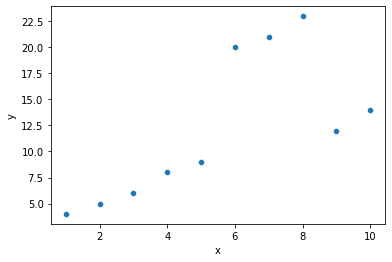

In [ ]:
# create a data frame
x = [1,2,3,4,5,6,7,8,9,10]
y = [4,5,6,8,9, 20, 21, 23, 12, 14]
df = pd.DataFrame({"x": x, 
"y": y})
df
# graph using sns
sns.scatterplot(x = 'x', y = 'y', data = df)
# it is a static 
chart = alt.Chart(df) # define a chart element
# create a scatterplot 
scat = chart.mark_point().encode(
    alt.X('x'),
    alt.Y('y')
)
# add a regression line to that

regline = scat.transform_regression('x', 'y').mark_line()

# we can add the two to form a layered plot

scat + regline

# read a real world data set
# NZ injury data set
nzinj = pd.read_csv("https://raw.githubusercontent.com/arinbasu/september_2021_data/main/injury_outcomes.csv")
# to compare rates across years, we will take age-standardised rates, W_W14 for Series




In [ ]:
# let's take a look at the data
nzinj.head()
# split the string on Period
nzinj [['year', 'quarter']] = nzinj['Period'].str.split(pat = '-', expand = True)
# test that it works
nzinj.head()
# let's select work related injuries in NZ
workinj = nzinj.loc[nzinj['Cause'] == 'Work'] # selects work related injuries
# test
workinj.head()
# take age standardised rates, Series_reference == 'W_W14'
workinj_asr = workinj.loc[workinj['Series_reference'] == 'W_W14']
# check you are right
workinj_asr.head()
# From the data set, select year, Age, Population, Severity, and Data_value
work_sel = workinj_asr[['year', 'Population', 'Age', 'Severity', 'Data_value']]
# Check you have done correctly
work_sel.head()
# How many years are presented?
work_sel['year'].value_counts().sort_values(ascending = True)
# Did not quite work, why?
work_sel['year'].dtype # find the data type # returns "object"
# We need to set it to Datetime
work_sel['yyyy'] = pd.to_datetime(work_sel['year'])
# returns a warning about setting with copy
# test if it works
work_sel.head()
# extract year data from yyyy
work_sel['yr'] = work_sel['yyyy'].dt.year



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


alt.LayerChart(...)

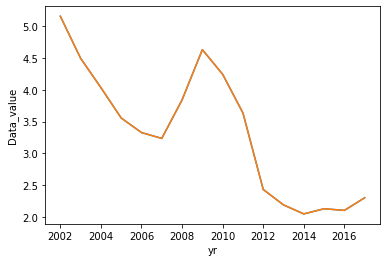

In [ ]:
# test if date extraction worked
work_sel.head()
# how many years?
work_sel['yyyy'].value_counts().sort_values(ascending = True) # intriguing
# how many ages?
list(work_sel.columns) # get a list of data columns
work_sel['Age'].value_counts() # so the only entry is All ages
# check
work_sel.tail() # true, it is "All ages", we can remove this
# How many severity?
work_sel['Severity'].value_counts() # Seems only fatal
work_sel['Severity'].tail() # only fatal

# How many Populations?
work_sel['Population'].value_counts() # everything is whole pop
# So let's select yyy, yr and Data_value
work = work_sel[['yyyy', 'yr', 'Data_value']]
# test
work.head()

# let's plot
plt.plot(work['yr'], work['Data_value'])
# quite a dull plot
sns.lineplot(x = 'yr', y = 'Data_value', data = work) # similar to matplotlib vanilla
# altair
chart2 = alt.Chart(work, title = "ASR of work related fatal injuries in NZ, 2002-2017")
point_plot = chart2.mark_point(size = 60).encode(
    alt.X('yyyy'),
    alt.Y('Data_value')
)
point_plot # here is a downward slope

# See the trend
trendline = point_plot.transform_regression('yyyy', 'Data_value').mark_line(color = "red")
# mix the point_plot and trend
# Let's fit a loess curve to the points
loessline = point_plot.transform_loess('yyyy', 'Data_value').mark_line(color = 'blue')
# Mix the three lines together
# Finally, we can add a line plot to it
line_plot = chart2.mark_line(color = "green").encode(
    alt.X('yyyy', title = "Year"),
    alt.Y('Data_value', title = "ASR of fatal work injuries")
)
# Mix them together
point_plot + trendline + loessline + line_plot




In [ ]:
list(work_sel.columns)
# this is still not quite interactive.
# let's pull up the original data set

workinj.head()
# age
workinj['Age'].value_counts()
list(workinj.columns)
workinj['Indicator'].value_counts()
workasr = workinj.loc[workinj['Indicator'] == 'Age-standardised rate']
# test
workasr['year'].value_counts()
# convert year to datetime.dt.year
workasr['yyyy'] = pd.to_datetime(workasr['year']).dt.year
workasr['yr'] = pd.to_datetime(workasr['year'])


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
list(workasr.columns)

['Series_reference',
 'Period',
 'Type',
 'Data_value',
 'Lower_CI',
 'Upper_CI',
 'Units',
 'Indicator',
 'Cause',
 'Validation',
 'Population',
 'Age',
 'Severity',
 'year',
 'quarter',
 'yyyy',
 'yr']

In [ ]:
# test
workasr['yyyy'].dtype

dtype('int64')

<AxesSubplot:xlabel='yr', ylabel='Data_value'>

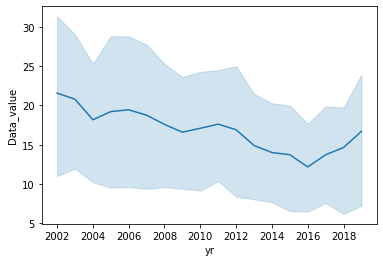

In [ ]:
sns.lineplot(x = 'yr', y = 'Data_value', data = workasr)

In [ ]:
# Let's do some interactive graphing with altair
# first create a altair chart object
chart3 = alt.Chart(workasr)
# then create a line plot
asr_line = chart3.mark_point().encode(
    alt.X('yr'),
    alt.Y('Data_value'),
    color = 'Population:N'
)

# put out asr_line
asr_line ## this line is very jagged!
# create a binding
inradio = alt.binding_radio(options = ['Maori', 'Whole pop'])
# create a selection and a condition and bindings
sel = alt.selection_single(fields = ['Population'], bind = inradio, name = "Group")
# create a condition
col_cond = alt.condition(sel, alt.Color('Population:N', legend = None), 
                              alt.value('white'))

asr_point = chart3.mark_point().encode(
    alt.X('yr'),
    alt.Y('Data_value'),
    color = 'Population:N'
)                            

# asr_point.transform_loess('yr', 'Data_value').mark_line()

In [ ]:
chart3 = alt.Chart(workasr)
# then create a line plot
asr_dots = chart3.mark_point().encode(
    alt.X('yr'),
    alt.Y('Data_value'),
    color = col_cond
    
)

asr_dots2 = asr_dots.add_selection(sel)

low1 = asr_dots.transform_loess('yyyy', 'Data_value').mark_line()

asr_dots2

alt.Chart(...)

In [ ]:
asr_dots2.save("foo.html")

In [ ]:
# Let's read another data set that of covid19
# read world covid data
url = "https://raw.githubusercontent.com/arinbasu/september_2021_data/main/sept_covid.csv"
covid = pd.read_csv(url)
# examine head
covid.head()

,Date,Country,ISO-3166 code,Confirmed cases,New cases,Deaths,New deaths,Transmission type,Days since last case
0,2020-03-01,Republic of Korea,KOR,4212,476,22,4,Local transmission,0
1,2020-03-01,Japan,JPN,254,15,6,1,Local transmission,0
2,2020-03-01,Singapore,SGP,106,4,0,0,Local transmission,0
3,2020-03-01,Australia,AUS,27,2,1,1,Local transmission,0
4,2020-03-01,Malaysia,MYS,24,0,0,0,Local transmission,3


In [ ]:
# let's select Australia and New Zealand
covaunz = covid.loc[covid['Country'].isin(['Australia', 'New Zealand'])]
# check
covaunz.head()
# check2
covaunz['Country'].value_counts() # 169 entries of AU and NZ
# convert Date to datetime
covaunz['Date'].dtype # is object or string type
covaunz['Datedx'] = pd.to_datetime(covaunz['Date'])
# check
covaunz.head()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Date,Country,ISO-3166 code,Confirmed cases,New cases,Deaths,New deaths,Transmission type,Days since last case,Datedx
3,2020-03-01,Australia,AUS,27,2,1,1,Local transmission,0,2020-03-01
8,2020-03-01,New Zealand,NZL,1,0,0,0,Imported cases only,3,2020-03-01
70,2020-03-02,Australia,AUS,33,6,1,0,Local transmission,0,2020-03-02
74,2020-03-02,New Zealand,NZL,2,1,0,0,Imported cases only,0,2020-03-02
146,2020-03-03,Australia,AUS,43,10,1,0,Local transmission,0,2020-03-03


In [ ]:
# keep confirmed cases, new caes, Deaths, Datedx, Country
# rename Confirmed cases to confirmed_cases and New cases to new_cases

covaunz.rename({"New cases": "new_cases",
"Confirmed cases": "confirmed_cases",
"New deaths": "new_deaths",
"Transmission type": "transmission_type",
"Days since last case": "days_since"}, axis = 1, inplace = True)
# check
covaunz.head()
# check 2
tcount = covaunz['transmission_type'].value_counts()
# check 3
sum(tcount.values)


/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


336

In [ ]:
tcount
#sum(tcount.values)

Clusters of cases      253
Local transmission      72
Imported cases only      4
Sporadic Cases           3
Sporadic cases           3
Cluster of cases         1
Name: transmission_type, dtype: int64

In [ ]:
list(covaunz.columns) # list of variables in the covaunz data set

['Date',
 'Country',
 'ISO-3166 code',
 'confirmed_cases',
 'new_cases',
 'Deaths',
 'new_deaths',
 'transmission_type',
 'days_since',
 'Datedx']

In [ ]:
# We will select Country, confirmed_cases, new_cases, Deaths, new_deaths, transmission_type, and Datedx
# for our analyses
# we will also take the last 6 months of data, i.e., covaunz.tail(120)
# let's see what is there in covaunz.tail(120)

covaunz120 = covaunz.tail(120)
covaunz120.tail() # gives us last five days (this is somewhat dated, but that's OK)
covaunz120.head() # gives us the first five days, when did it begin (since June)

# let's roll back 60 
covaunz60 = covaunz.tail(60)
covaunz60.head()
covaunz60.tail()
covaunz120.tail()

,Date,Country,ISO-3166 code,confirmed_cases,new_cases,Deaths,new_deaths,transmission_type,days_since,Datedx
33821,2020-08-13,New Zealand,NZL,1251,13,22,0,Clusters of cases,0,2020-08-13
34035,2020-08-14,Australia,AUS,22743,385,375,14,Clusters of cases,0,2020-08-14
34038,2020-08-14,New Zealand,NZL,1258,7,22,0,Clusters of cases,0,2020-08-14
34252,2020-08-15,Australia,AUS,23035,292,379,4,Clusters of cases,0,2020-08-15
34255,2020-08-15,New Zealand,NZL,1271,13,22,0,Clusters of cases,0,2020-08-15


In [ ]:
# let's select our variables
aunz1 = covaunz120[['Datedx', 'Country', 'new_cases', 'confirmed_cases', 'Deaths', 'new_deaths', 'transmission_type']]

In [ ]:
# check that we have the correct data
aunz1.head()

,Datedx,Country,new_cases,confirmed_cases,Deaths,new_deaths,transmission_type
21451,2020-06-17,Australia,23,7370,102,0,Clusters of cases
21452,2020-06-17,New Zealand,1,1157,22,0,Clusters of cases
21668,2020-06-18,Australia,21,7391,102,0,Clusters of cases
21669,2020-06-18,New Zealand,0,1157,22,0,Clusters of cases
21885,2020-06-19,Australia,18,7409,102,0,Clusters of cases


In [ ]:
# let's plot now
# create a chart
anz_chart = alt.Chart(aunz1)
# next add lines to it
anz_lines = anz_chart.mark_line()
# next, encode for new cases

# let's see how the graph looks like



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b6574ff9-d814-46ab-ab3d-b329fe11e288' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>